## Basics

In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats
plts=Plots(p)

In [ ]:
import numpy as np
ax = np.newaxis
from Multiworker_Contract_GE_JITted import MultiworkerContract
mwc_J=MultiworkerContract(p)
#model=mwc_J.J_sep(Jg=np.zeros(mwc_J.J_grid.shape)+cc_J[...,ax],Wg=np.zeros(mwc_J.J_grid.shape)+cc_W[...,ax],Ug=cc_U,update_eq=0,s=1)
model=mwc_J.J_sep(update_eq=1,s=0)

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

with open("results_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
results_GE = get_results_for_p(p,all_results)

with open("model_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
model = get_results_for_p(p,all_results)

No results found for p = (5, 200, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 0.25, 1.0)
(5, 200, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 0.25, 1.0)
(5, 200, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 0.25, 1.0)


In [3]:
from simulate import Simulator
sim = Simulator(model,p)
moms_mean,_,moms_unt_mean,_ = sim.simulate_moments_rep(3)
moms_mean

Loading model from: c:\Users\zaloilo\Documents\GitHub\Dynamic-Contracting-Multi-worker-Firm\VFI\CRS\model_GE.pkl
(5, 200, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 0.25, 1.0)


c:\Users\zaloilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\zaloilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfixest\estimation\feols_.py:965: RuntimeWarning: invalid value encountered in divide
  self._tstat = _beta_hat / self._se
c:\Users\zaloilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfixest\estimation\feols_.py:2058: RuntimeWarning: invalid value encountered in scalar divide
  self._r2 = 1 - (ssu / ssy)
c:\Users\zaloilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfixest\estimation\feols_.py:2059: RuntimeWarning: invalid value encountered in scalar divide
  self._adj_r2 = 1 - (ssu / ssy) * _adj_factor
c:\Users\zaloilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfixest\estimation\feols_.py:2703: UserWarning: 
            2 variables dropped due to multicollinea

total_output               4.033780e+00
total_wage_gross           3.533812e+00
total_wage_net             3.533812e+00
total_uben                 9.951477e-03
pr_u2e                     3.972707e-01
pr_j2j                     4.619644e-05
pr_e2u                     4.853826e-03
cov_dydsep                -1.121382e-02
var_dy                     2.850719e-02
cov_dydy_l4                7.379630e-03
cov_dydw                   2.948461e-07
var_w_longac              -2.047860e-05
var_w                      4.143412e-05
cov_dwdw_l4                2.754276e-10
cov_dwdw_l8                4.173716e-09
var_dw                     3.377836e-05
mean_dw                    3.945612e-04
w_u2e_ee_gap               9.468674e-02
mean_dw_j2j_2             -1.227523e-03
pr_new_hire                5.469569e-03
avg_w_growth_7             1.040225e-01
sd_dypw                    1.490474e-01
autocov_ypw                4.287020e-02
layoffs_share_tercile_0    5.214425e-03
layoffs_share_tercile_1    4.483417e-03


In [8]:
moms_unt_mean

regression           coef        
wage_pass_ten        Intercept       0.000395
                     C(s)[5]:dypw    0.009141
                     C(s)[6]:dypw   -0.001512
                     C(s)[7]:dypw   -0.000093
                     C(s)[8]:dypw   -0.000145
                                       ...   
sep_ten              Intercept       0.009402
sep_pass_ten         Intercept       0.000000
                     C(e)[1]:dypw    0.000000
sep_pass_ten_simple  Intercept       0.000000
                     dypw            0.000000
Name: regressions_mean, Length: 103, dtype: float64

u= 2.0 = min wage (s=10)
pr_u2e              0.415207
pr_j2j              0.134193
pr_e2u              0.011334
cov_dydw            0.000170 <- EXTREMELY LOW??? Is that truly the impact of u here?
min_wage = 1.2 * u (s=5) <- refused to work with higher s (assertion error)>
pr_u2e              0.406773
pr_j2j              0.149216
pr_e2u              0.004953
cov_dydw           -0.000050 <- makes nooooo sense, esp since layoffs went down

u= 2.4 = min wage (s=0) <- refused to work with higher s (assertion error)>
pr_u2e              0.466228
pr_j2j              0.019130
pr_e2u              0.004880
cov_dydw            0.000988

min_wage = 1.2 * u (s=0)
pr_u2e              3.212060e-01 <buuuut so is also the job finding rate>
pr_j2j              9.069822e-06
pr_e2u              2.224588e-03 <- again, layooffs lower???>
cov_dydw            1.167461e-06 <- aaaaan so is wage passthrough>

WRONG RESULTS HERE. LITERALLY FAKE
u= 2.0 = min wage e2u is 0.012042 <- Still toooo small>
cov_dydw            0.001222
pr_u2e              0.558683
Noow same but noo HMQ
e2u is zero lol
u = 2.0, min_wage = 1.2 u; e2u is 0.010747 <- LOWER
cov_dydw            0.001096 ALSO LOWER. DAMN.
pr_u2e              0.557146
u = 2.3 = min wage


In [ ]:
import numpy as np
ax = np.newaxis
from Multiworker_Contract_J import MultiworkerContract
mwc_J=MultiworkerContract(p)
#model=mwc_J.J_sep(Jg=np.zeros(mwc_J.J_grid.shape)+cc_J[...,ax],Wg=np.zeros(mwc_J.J_grid.shape)+cc_W[...,ax],Ug=cc_U,update_eq=0,s=1)
model=mwc_J.J_sep(update_eq=1,s=0,layoff_iter=1)

In [ ]:
u= 1.0 , 3.510171e-03, or even 8e-04.... fuck me bros

In [6]:
model.Vf_W.min()


np.float64(39.634454607396236)

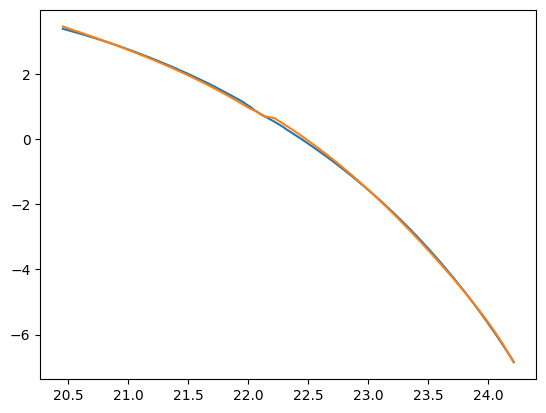

In [8]:
prod = p.z_0-2
plt.plot(model.Vf_W[prod, :, 0], model.Vf_J [prod, :, 0], label='1 senior value function')
plt.plot(model.Vf_W[prod, :, 0], model.Jp[prod, :, 0], label='1 senior value function')  
plt.show()

np.float64(0.05182906323891566)

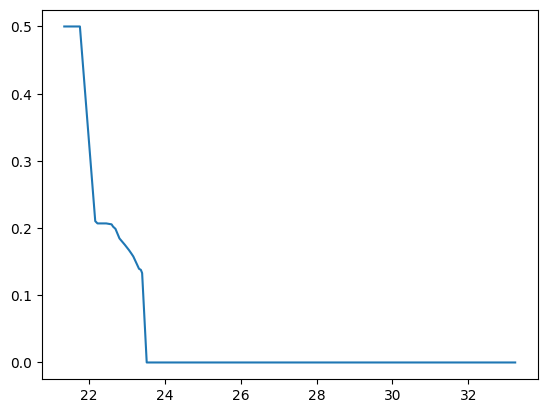

In [11]:
#plt.plot(model.Vf_W[p.z_0-2, :, 0], model.rho_star [p.z_0-2, :, 0], label='1 senior value function')
q=0
prod=p.z_0-0 #soomehow layoffs are higher in high productivity states???
plt.plot(model.Vf_W[prod, :, q], model.sep_star[prod, :, q], label='1 senior value function')  
model.sep_star.mean()

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

No results found for p = (3, 200, 6, 5, 11, 0.5, 0.5, 5.0, 0.85, 1.0, 1.0)
